![example](images/director_shot.jpeg)

# Movie Advice for Microsoft

**Author:** N Bisgin
***

## Overview

This project aims to give advice to Microsoft (hypothetically) on which types of movies to create for their new movie studio based on data from IMDB, TMDB, BOM and TN. The data is provided by Flatiron school and collected from the respective websites. 

Using explatory data analysis, I tried to understand what are some important factors for being successful in the industry.

## Business Problem

The business needs general overview about the movie industry. 
    
I believe deciding on the movie genre and the people to work with for the movie are important factors and is a good starting point for a new movie studio. Given the data, I think ratings and profit are good measures of success for a movie.
    
If we understand which genres are more profitable and have higher ratings, the business can invest in those kind of movies. 

## Data Understanding

The data is collected from Box Office Mojo, IMDB, Rotten Tomatoes, and TheMovieDB.org. The data has information about movie titles, genres, directors, actors, profits, release year.

The data provides information about 16184 movies when merged on common columns. I have included information about movie genres, profit, primary people such as directors, writers and actors along with ratings.

Target variables are the ratings and profit.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
bom_movie_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
imdb_name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
imdb_title_akas = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
imdb_title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
imdb_title_principals = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
imdb_title_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
#rt_movie_info = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz')
#rt_reviews = pd.read_csv('data/zippedData/rt.reviews.tsv.gz')
tmdb_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
tn_movie_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [3]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
imdb_name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
imdb_title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [6]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
imdb_title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [8]:
imdb_title_principals.head() 

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [9]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [11]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Preparation

**Here are the datasets that I used for analysis:**
    
imdb datasets: imdb_title_basics, imdb_title_crew, imdb_title_principals, imdb_title_ratings, imdb_name_basics

tmdb dataset: tmdb_movies

bom dataset: bom_movie_gross

tn dataset: tn_movie_budgets

In [12]:
# There is the directors column in imdb_title_crew data
# If there is no director listed, I dropped the row from further analysis
# Sometimes there is more than one director, so I picked the first director as the director of the movie for this analysis
imdb_title_crew = imdb_title_crew.dropna(subset=['directors'])
imdb_title_crew['directors'] = [x.split(',')[0] for x in imdb_title_crew['directors']]

# I merged imdb related datasets on the value 'tconst'
imdb1 = pd.merge(imdb_title_basics,imdb_title_crew, how='inner',on='tconst')
imdb2 = pd.merge(imdb_title_principals, imdb_title_ratings, how='inner',on='tconst')
imdb3 = pd.merge(imdb1,imdb2, how='inner',on='tconst')

# One of the imdb datasets, imdb name basics, did not have the value 'tconst', 
# but had another value 'nconst', so I merged it on 'nconst'
imdb = pd.merge(imdb_name_basics,imdb3, how='inner',left_on='nconst', right_on='directors')

# tmbd data did not have either value (tconst or nconst), 
# so I merged it using the 'original_title'
itmb = pd.merge(tmdb_movies,imdb, how='inner',on='original_title')
itmb.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,genres,directors,writers,ordering,nconst_y,category,job,characters,averagerating,numvotes
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",10,nm0006035,composer,NaN,NaN,7.7,425530
1,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",1,nm0705356,actor,NaN,"[""Harry Potter""]",7.7,425530
2,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",2,nm0914612,actress,NaN,"[""Hermione Granger""]",7.7,425530


In [13]:
itmb.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'nconst_x', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles', 'tconst', 'primary_title',
       'start_year', 'runtime_minutes', 'genres', 'directors', 'writers',
       'ordering', 'nconst_y', 'category', 'job', 'characters',
       'averagerating', 'numvotes'],
      dtype='object')

I dropped the following columns from the data:

   "original_title, primary_title, Unnamed: 0, genre_ids, id, nconst, tconst,
   original_language, release_date, start_year, birth_year, death_year, 
   known_for_titles,  category, job, characters, primary_profession, 
   vote_count, runtime_minutes, ordering, directors, numvotes, writers"

In [14]:
itmb.drop(['original_title','primary_title','Unnamed: 0','genre_ids','id','original_language','release_date','known_for_titles','nconst_x','nconst_y','tconst','start_year','birth_year','death_year','vote_count','runtime_minutes','category','job','characters','ordering','primary_profession', 'directors', 'numvotes', 'writers' ], axis=1,inplace=True)
itmb.drop_duplicates(inplace=True)
itmb.head(3)

,popularity,title,vote_average,primary_name,genres,averagerating
0,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,David Yates,"Adventure,Fantasy,Mystery",7.7
10,28.734,How to Train Your Dragon,7.7,Chris Sanders,"Action,Adventure,Animation",8.1
20,28.515,Iron Man 2,6.8,Jon Favreau,"Action,Adventure,Sci-Fi",7.0


In [15]:
# I merged the bom_movie_gross data using movie titles

itmbom = pd.merge(bom_movie_gross,itmb, how='inner',on='title')
itmbom.head(3)

,title,studio,domestic_gross,foreign_gross,year,popularity,vote_average,primary_name,genres,averagerating
0,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,Lee Unkrich,"Adventure,Animation,Comedy",8.3
1,Inception,WB,292600000.0,535700000,2010,27.920,8.3,Christopher Nolan,"Action,Adventure,Sci-Fi",8.8
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,15.041,6.1,Mike Mitchell,"Adventure,Animation,Comedy",6.3


In [16]:
itmbomtn = pd.merge(itmbom, tn_movie_budgets, how='inner',left_on='title', right_on='movie')
itmbomtn.head(3)

,title,studio,domestic_gross_x,foreign_gross,year,popularity,vote_average,primary_name,genres,averagerating,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,Lee Unkrich,"Adventure,Animation,Comedy",8.3,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,27.920,8.3,Christopher Nolan,"Action,Adventure,Sci-Fi",8.8,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,15.041,6.1,Mike Mitchell,"Adventure,Animation,Comedy",6.3,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"


In [17]:
# domestic_gross is an object (str), needs to be converted to integer and get rid of '$' sign and comma
itmbomtn['worldwide_gross'] = itmbomtn['worldwide_gross'].str.replace(',','').str.replace('$','').astype(int)
itmbomtn['worldwide_gross'].head()

0    1068879522
1     835524642
2     756244673
3     706102828
4     621156389
Name: worldwide_gross, dtype: int64

In [18]:
# production_budget is an object (str), needs to be converted to integer and get rid of '$' sign and comma
itmbomtn['production_budget'] = itmbomtn['production_budget'].str.replace(',','').str.replace('$','').astype(int)
itmbomtn['production_budget'].head()

0    200000000
1    160000000
2    165000000
3     68000000
4    170000000
Name: production_budget, dtype: int64

I created a value 'profit', which is simply the worldwide_gross minus production_cost.
       
I dropped rows with missing worldwide_gross or production_cost values.
        
Dropping the nan values, rather than replacing them is an appropriate choice, since I want to provide accurate information.

I later dropped studio, year, domestic_gross, foreign_gross, worldwide_gross columns, since they are not necessary for further analysis.

In [19]:
itmbomtn = itmbomtn.dropna(subset=['worldwide_gross', 'production_budget'])
itmbomtn['profit']=itmbomtn['worldwide_gross']-itmbomtn['production_budget']
itmbomtn.drop(['studio','year','domestic_gross_x','domestic_gross_y','worldwide_gross','id','movie','release_date','foreign_gross','production_budget'], axis=1,inplace=True)
itmbomtn.head(3)

,title,popularity,vote_average,primary_name,genres,averagerating,profit
0,Toy Story 3,24.445,7.7,Lee Unkrich,"Adventure,Animation,Comedy",8.3,868879522
1,Inception,27.920,8.3,Christopher Nolan,"Action,Adventure,Sci-Fi",8.8,675524642
2,Shrek Forever After,15.041,6.1,Mike Mitchell,"Adventure,Animation,Comedy",6.3,591244673


In [179]:
itmbomtn.shape

(1505, 7)

## Data Modeling

I wanted to understand the profitability of different genres of movies.
I also wanted to analyze the change of ratings for different genres. I checked both imdb and tmdb ratings.
    
Secondly, I wanted to find out whom Microsoft should work with for the best profit. Which directors, writers or actors are deriving the most profitable movies and which of them have the best ratings?
    
I used the domestic_gross and foreign_gross to calculate the profit at my first attempt. Then, I found out the information about production_budget, so I included that in the calculation to get a better result.
    
I think deciding the genres of the movie and whom to work with based on the profit and ratings is a good step for a first attempt at creating a new movie studio. This will give an general sense of the indsutry.

In [35]:
genre_counts = itmbomtn.groupby('genres').count().sort_values(['title'],ascending=False)['title']
genre_counts

genres
Drama                         95
Adventure,Animation,Comedy    63
Comedy,Drama                  55
Comedy,Drama,Romance          54
Action,Adventure,Sci-Fi       43
                              ..
Action,Biography,Comedy        1
Action,Biography,Crime         1
Crime,Documentary              1
Comedy,Thriller                1
Comedy,Drama,Sport             1
Name: title, Length: 210, dtype: int64

In [22]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

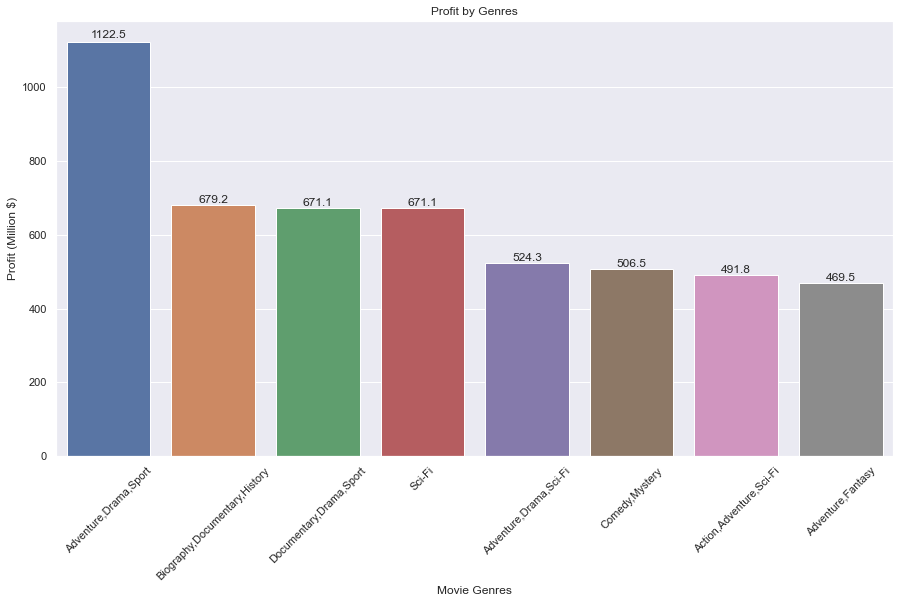

In [23]:
df1 = itmbomtn.groupby('genres').mean().sort_values(['profit'],ascending=False)
tg = df1[df1['profit']>0.4*(10**9)]
tg1 = tg.reset_index()
tg1 ['profit'] = tg1['profit']/(10**6)
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='genres',y='profit',data=tg1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set(xlabel = "Movie Genres", ylabel = "Profit (Million $)", title = 'Profit by Genres')
show_values(ax)
#import random
#ax.set_yticks(random.sample(range(0,1000),1000))
None #don't show the label objects

In [36]:
tg1.genres.head(8)

0            Adventure,Drama,Sport
1    Biography,Documentary,History
2          Documentary,Drama,Sport
3                           Sci-Fi
4           Adventure,Drama,Sci-Fi
5                   Comedy,Mystery
6          Action,Adventure,Sci-Fi
7                Adventure,Fantasy
Name: genres, dtype: object

In [37]:
genre_counts['Adventure,Drama,Sport']

2

In [38]:
genre_counts['Biography,Documentary,History']

2

In [39]:
genre_counts['Documentary,Drama,Sport']

2

In [40]:
genre_counts['Sci-Fi']

2

In [41]:
genre_counts['Adventure,Drama,Sci-Fi']

2

In [42]:
genre_counts['Comedy,Mystery']

1

In [43]:
genre_counts['Action,Adventure,Sci-Fi']

43

In [44]:
genre_counts['Adventure,Fantasy']

3

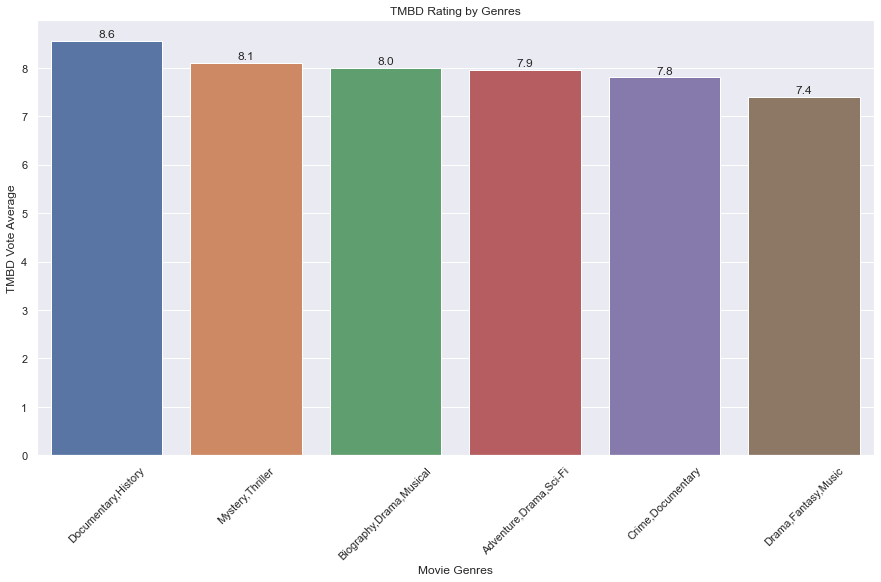

In [26]:
df2 = itmbomtn.groupby('genres').mean().sort_values(['vote_average'],ascending=False)
va = df2[df2['vote_average']>7.2]
va1 = va.reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='genres',y='vote_average',data=va1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set(xlabel = "Movie Genres", ylabel = "TMBD Vote Average", title = 'TMBD Rating by Genres')
show_values(ax)
None #don't show the label objects

In [45]:
va1.genres.head(6)

0        Documentary,History
1           Mystery,Thriller
2    Biography,Drama,Musical
3     Adventure,Drama,Sci-Fi
4          Crime,Documentary
5        Drama,Fantasy,Music
Name: genres, dtype: object

In [46]:
genre_counts['Documentary,History']

2

In [47]:
genre_counts['Mystery,Thriller']

1

In [48]:
genre_counts['Biography,Drama,Musical']

1

In [49]:
genre_counts['Adventure,Drama,Sci-Fi']

2

In [50]:
genre_counts['Crime,Documentary']

1

In [51]:
genre_counts['Drama,Fantasy,Music']

1

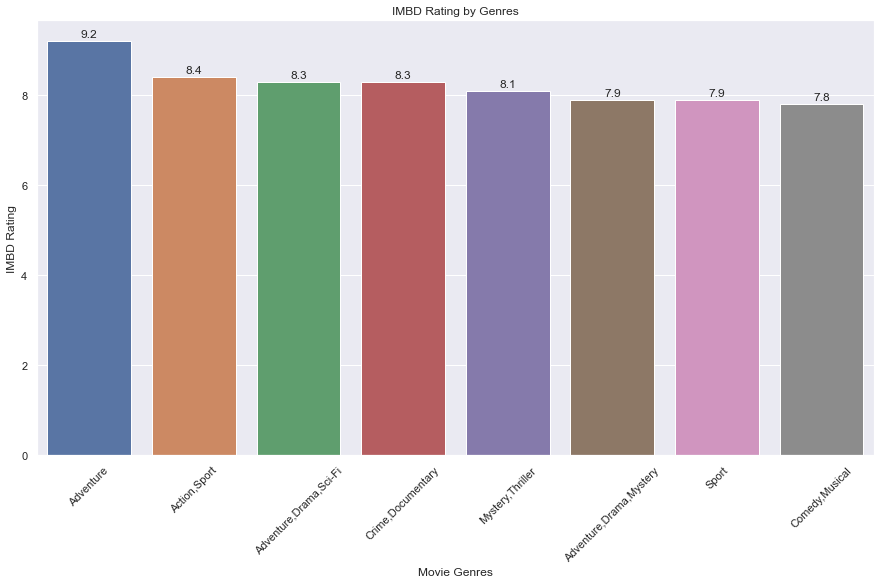

In [53]:
df3 = itmbomtn.groupby('genres').mean().sort_values(['averagerating'],ascending=False)
ar = df3[df3['averagerating']>7.6]
ar1 = ar.reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='genres',y='averagerating',data=ar1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set(xlabel = "Movie Genres", ylabel = "IMBD Rating", title = 'IMBD Rating by Genres')
show_values(ax)
None #don't show the label objects

In [54]:
ar1.genres.head(8)

0                  Adventure
1               Action,Sport
2     Adventure,Drama,Sci-Fi
3          Crime,Documentary
4           Mystery,Thriller
5    Adventure,Drama,Mystery
6                      Sport
7             Comedy,Musical
Name: genres, dtype: object

In [55]:
genre_counts['Adventure']

1

In [56]:
genre_counts['Action,Sport']

1

In [57]:
genre_counts['Adventure,Drama,Sci-Fi']

2

In [58]:
genre_counts['Crime,Documentary']

1

In [59]:
genre_counts['Mystery,Thriller']

1

In [60]:
genre_counts['Adventure,Drama,Mystery']

1

In [61]:
genre_counts['Sport']

2

In [62]:
genre_counts['Comedy,Musical']

1

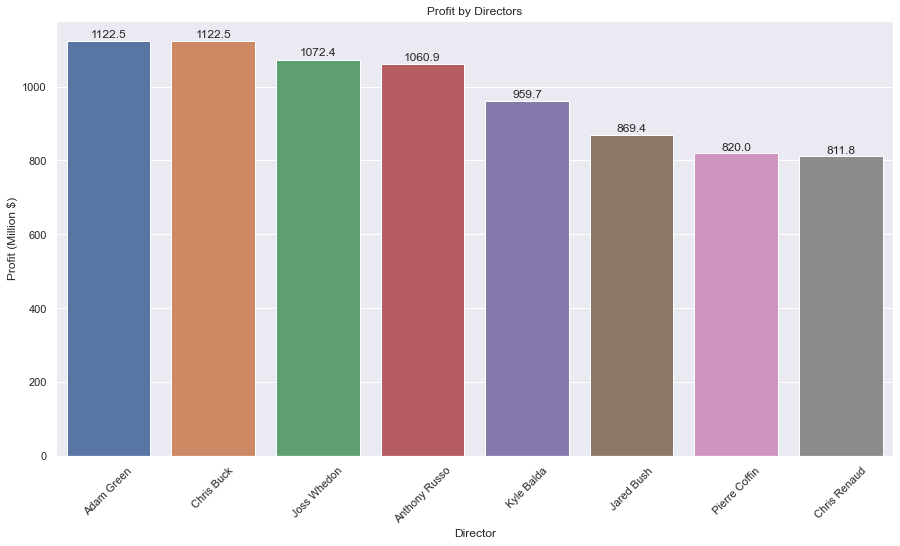

In [68]:
df4 = itmbomtn.groupby('primary_name').mean().sort_values(['profit'],ascending=False)
tg2 = df4[df4['profit']>0.8*(10**9)]
tg2 = tg2.reset_index()
tg2 ['profit'] = tg2['profit']/(10**6)
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='primary_name',y='profit',data=tg2)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set(xlabel = "Director", ylabel = "Profit (Million $)", title = 'Profit by Directors')
show_values(ax)
None #don't show the label objects

In [67]:
tg2.primary_name.head(8)

0       Adam Green
1       Chris Buck
2      Joss Whedon
3    Anthony Russo
4       Kyle Balda
5       Jared Bush
6    Pierre Coffin
7     Chris Renaud
Name: primary_name, dtype: object

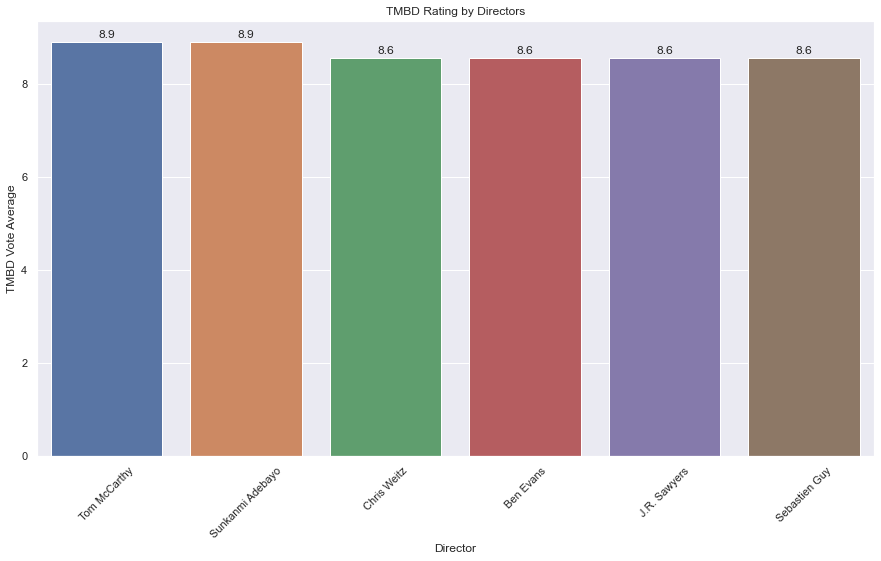

In [72]:
df5 = itmbomtn.groupby('primary_name').mean().sort_values(['vote_average'],ascending=False)
va2 = df5[df5['vote_average']>8.5]
va2 = va2.reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='primary_name',y='vote_average',data=va2)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set(xlabel = "Director", ylabel = "TMBD Vote Average", title = 'TMBD Rating by Directors')
show_values(ax)
None #don't show the label objects

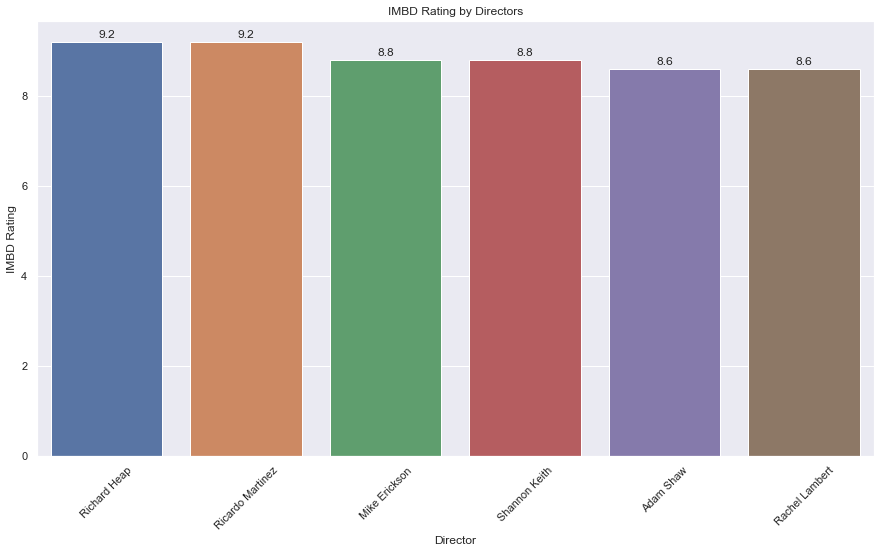

In [73]:
df6 = itmbomtn.groupby('primary_name').mean().sort_values(['averagerating'],ascending=False)
ar2 = df6[df6['averagerating']>8.5]
ar2 = ar2.reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='primary_name',y='averagerating',data=ar2)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set(xlabel = "Director", ylabel = "IMBD Rating", title = 'IMBD Rating by Directors')
show_values(ax)
None #don't show the label objects

In [74]:
va2.primary_name.head(5)

0        Tom McCarthy
1    Sunkanmi Adebayo
2         Chris Weitz
3           Ben Evans
4        J.R. Sawyers
Name: primary_name, dtype: object

In [75]:
ar2.primary_name.head(5)

0        Richard Heap
1    Ricardo Martinez
2       Mike Erickson
3       Shannon Keith
4           Adam Shaw
Name: primary_name, dtype: object

## Evaluation

We have some general knowledge about how to make a profitable and popular movie in terms of genres and directors, writers and actors. I think this is a good first step in analysis.
    
I think these results would generalize beyond this data because there are 1505 movies, which is a quite large number.
    
I think this analysis will be helpful in choosing genres and people to work with.

## Conclusions

In terms of best movie genres for the highest profit, here are the top 5 genres that I would recommend:
        
        1. Adventure,Drama,Sport
        2. Biography,Documentary,History
        3. Sci-Fi
        4. Documentary,Drama,Sport
        5. Adventure,Drama,Sci-Fi
        
One important note about this list is it gives a combination of genres instead of one. That is how the original data was provided, thus the result is recommending a mix of genres for a new movie. 
        
Also, for the highest profit, the company should consider the top names to work with for a new movie. I focused on directors for the analysis. Here are the top 5 directors that brought in the highest profit:
        
        1. Adam Green
        2. Chris Buck
        3. Joss Whedon
        4. Anthony Russo
        5. Kyle Balda
        
        
In terms of ratings, IMDB and TMBD had different results on the best genres. 
        
Here are the top 5 movie genres by average votes on TMDB:
        
        1. Documentary,History
        2. Mystery,Thriller
        3. Biography,Drama,Musical
        4. Adventure,Drama,Sci-Fi
        5. Crime,Documentary

And, here are the top 5 genres according to IMDB ratings:
        
        1. Adventure
        2. Action,Sport
        3. Crime,Documentary
        4. Adventure,Drama,Sci-Fi
        5. Mystery,Thriller
        
Again, in terms of ratings, IMDB and TMBD had different results on the best directors to work with. 
        
Here are the top 5 directors by average votes on TMDB:

        1. Tom McCarthy
        2. Sunkanmi Adebayo
        3. Chris Weitz
        4. Ben Evans
        5. J.R. Sawyers

Here are the top 5 directors by average votes on IMDB:

        1. Richard Heap
        2. Ricardo Martinez
        3. Mike Erickson
        4. Shannon Keith
        5.Adam Shaw
        
I think there are many other factors to consider, such as the time of the year, the economy or any crisis going on, that are not included in this analysis. Therefore, this primary analysis will give a general idea about where to start, but more analysis should be done for better understanding of the industry.
        
I can focus on specific genres instead of a mix of genres. I can also analyze the writers and actors for a more comprehensive analysis.